<h4> Objective


Upon initial inspection of the data, we can start thinking of some questions about it that we would want to answer

-- What is the overall sales trend?  
-What are the top 10 products by sales?   
-What are the most selling products?      
-Which is the most preffered ship mode?    
-Which are the most profittable category and sub-category

<h4> IMPORTING REQUIRED LIBRARIES

In [60]:
# Data Manipulation
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

<h4> IMPORTING THE DATASET

In [63]:
df = pd.read_excel('superstore_sales.xlsx')


<h4> DATA AUDIT

In [64]:
# First five(5) rows of the data
df.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [65]:
# Last five(5) rows of the data
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [66]:
# Shape of the dataset
df.shape

(51290, 21)

In [67]:
# Columns present in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [68]:
# A consise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [69]:
# Checking for missing value
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [72]:
# Getting descriptive statistics summary
df.describe().drop(columns=['order_date','ship_date']).round(3)

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000,51290.000,51290.000,51290.000,51290.000,51290.000
mean,246.491,3.477,0.143,28.642,26.376,2012.777
min,0.444,1.000,0.000,-6599.978,0.002,2011.000
25%,30.759,2.000,0.000,0.000,2.610,2012.000
50%,85.053,3.000,0.000,9.240,7.790,2013.000
75%,251.053,5.000,0.200,36.810,24.450,2014.000
max,22638.480,14.000,0.850,8399.976,933.570,2014.000
std,487.565,2.279,0.212,174.424,57.297,1.099


In [74]:
# Checking for duplicate value
df.duplicated().sum()

0

<h4> EXPLANATORY DATA ANALYSIS

In [76]:
-----------------------# What  is the overall sales trend?

df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [77]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [78]:
# Getting month year from the dataset
df['month_year']= df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [83]:
# Grouping month year
df_trend = df.groupby('month_year')['sales'].sum().reset_index()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


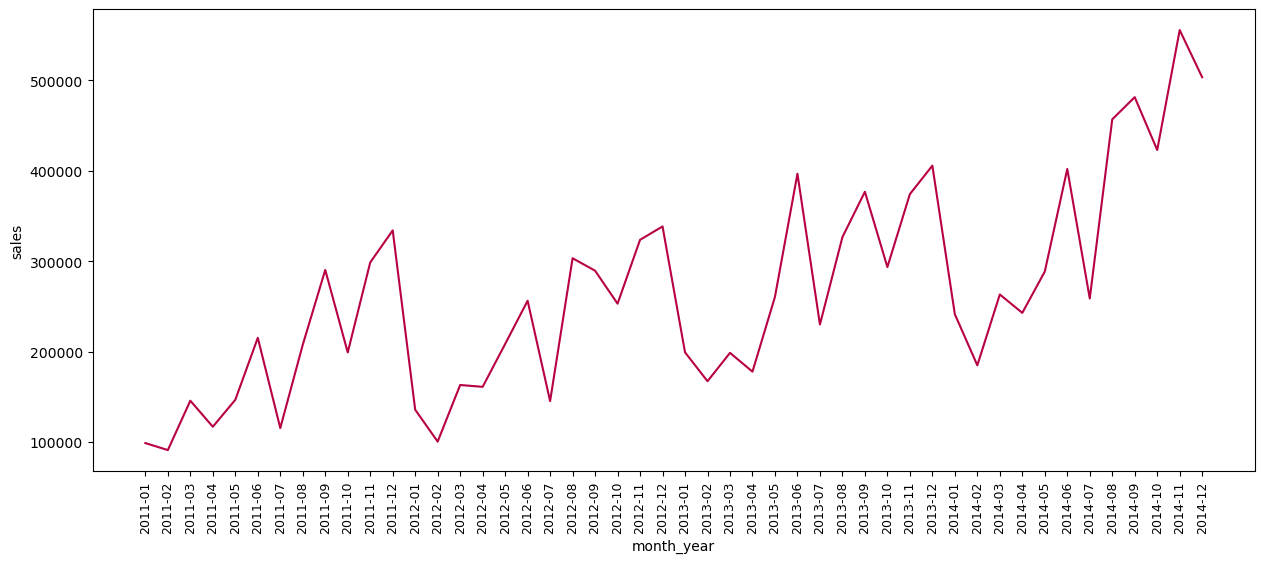

In [89]:
# Setting the figure size

plt.figure(figsize=(15,6))
sns.lineplot(x='month_year',y='sales', data=df_trend, color='#b80045')
plt.xticks(rotation='vertical', size=9)
plt.show()

In [92]:
---------------------------# What are the top 10 product by sales?

# Grouping the product name column
df_product = pd.DataFrame(df.groupby('product_name')['sales'].sum())

In [95]:
# Sorting prod_sales column
df_product=df_product.sort_values(by='sales', ascending=False)

In [97]:
# Top 10 product by sales
df_product[:10].round(2)

,sales
product_name,
"Apple Smart Phone, Full Size",86935.78
"Cisco Smart Phone, Full Size",76441.53
"Motorola Smart Phone, Full Size",73156.30
"Nokia Smart Phone, Full Size",71904.56
Canon imageCLASS 2200 Advanced Copier,61599.82
"Hon Executive Leather Armchair, Adjustable",58193.48
"Office Star Executive Leather Armchair, Adjustable",50661.68
"Harbour Creations Executive Leather Armchair, Adjustable",50121.52
"Samsung Smart Phone, Cordless",48653.46


In [106]:
# What are the most selling product?

# Grouping product name

most_sell_prod = df.groupby('product_name')['quantity'].sum()


In [109]:
most_sell_prod = pd.DataFrame(most_sell_prod)

In [112]:
# Sorting  most sell product
most_sell_prod=most_sell_prod.sort_values('quantity', ascending=False)

In [113]:
# Top 10 selling product

most_sell_prod[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


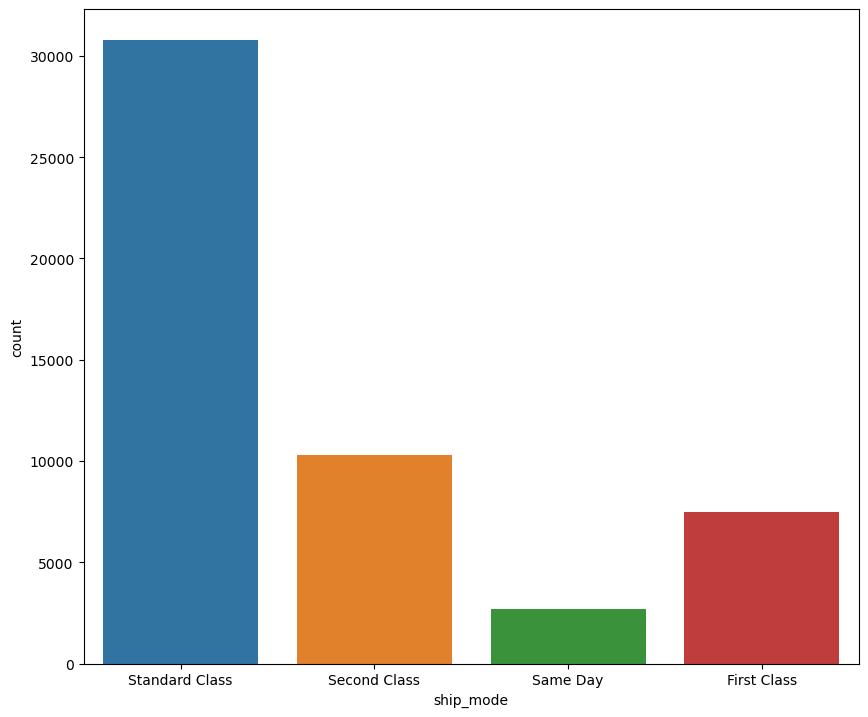

In [129]:
#  Which is the most preffered ship mode?

# Setting figure size
plt.figure(figsize=(10,8.5))

sns.countplot(x='ship_mode', data=df)

plt.show()

In [135]:
# Which are the most profitable category and sub-category

# Grouping  category ND SUB-CATEGORY

cat_subcat_profit = pd.DataFrame(df.groupby(['category','sub_category'])['profit'].sum())

In [138]:
# Sorting the cat_subcat_profit
cat_subcat_profit.sort_values(['category','sub_category'], ascending=False)

profit
category        sub_category              
Technology      Phones        216717.00580
                Machines       58867.87300
                Copiers       258567.54818
                Accessories   129626.30620
Office Supplies Supplies       22583.26310
                Storage       108461.48980
                Paper          59207.68270
                Labels         15010.51200
                Fasteners      11525.42410
                Envelopes      29601.11630
                Binders        72449.84600
                Art            57953.91090
                Appliances    141680.58940
Furniture       Tables        -64083.38870
                Furnishings    46967.42550
                Chairs        141973.79750
                Bookcases     161924.41950